## Import packages

In [2]:
import os
import h5py
import numpy as np
import pandas as pd
import tkinter
import matplotlib.pyplot as plt
from utilities import importFile, openFile
from tkinter.filedialog import askopenfilename, askopenfilenames
from collections import defaultdict
from nptdms import TdmsFile
print("done!")

done!


## Open an .hdf5 file and extract channels

In [3]:
voltage_mV, current_pA, command, ttl, extracted_channels, corrected_trial_keys, channel_list, channels_data_frame, time, dt, folder_name, file_name = importFile(curated_channel = 'Sweeps_Analysis')

In [17]:
print(voltage_mV)
channels_data_frame


[array([-1.61241283, -1.22602076, -1.54801415, ..., -1.51581482,
       -1.19382142, -1.61241283]), array([-1.54801415, -1.4192168 , -1.2582201 , ..., -1.4192168 ,
       -1.70901085, -1.48361548]), array([-1.74121019, -1.48361548, -1.61241283, ..., -1.58021349,
       -1.80560887, -1.80560887]), array([-1.51581482, -1.51581482, -1.70901085, ..., -1.22602076,
       -1.64461217, -1.61241283]), array([-1.38701746, -1.61241283, -1.2582201 , ..., -1.45141614,
       -1.45141614, -1.54801415]), array([-1.2582201 , -1.45141614, -1.38701746, ..., -1.38701746,
       -1.54801415, -1.35481812]), array([-1.38701746, -1.54801415, -1.22602076, ..., -1.19382142,
       -1.51581482, -1.74121019]), array([-1.22602076, -1.54801415, -1.74121019, ..., -1.38701746,
       -1.38701746, -1.54801415]), array([-1.54801415, -1.54801415, -1.45141614, ..., -1.06502406,
       -1.22602076, -1.64461217]), array([-1.74121019, -1.74121019, -1.4192168 , ..., -1.9988049 ,
       -1.96660556, -2.15980159]), array([-2

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."
Channel B,"[-11.616220826606902, -7.752300066135383, -8.7...","[9.635343909020817, 5.771422947326991, 11.8892...","[0.29753499493087243, -0.6684452226398963, 1.9...","[-20.632035761040658, -17.734095272842332, -22...","[-11.938214221299425, -13.870174582953112, -14...","[-7.752300066135383, -8.718280260436195, -9.68...","[-4.532366064980151, -0.6684452226398963, -5.8...","[5.449429535875142, 6.737403183549116, -0.3464...","[-3.2443924558328088, -4.210372663158741, -0.9...","[8.669363664395322, 4.805442713904577, 0.61952...","[-24.817949755377462, -25.13994313739636, -29....","[-10.97223403629284, -17.734095272842332, -15....","[-10.00625384849881, -8.074293464545597, -10.0...","[6.093416359089918, 6.737403183549116, 6.09341...","[-2.922399052770176, -0.3464518170935623, -2.2...","[-12.58220100975559, -10.650240640671248, -12....","[-12.260207615682315, -11.294227431604716, -14...","[-3.2443924558328088, 0.619528401409027, -1.95..."
Output A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Output B,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [5]:
print(command)

[array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.])]


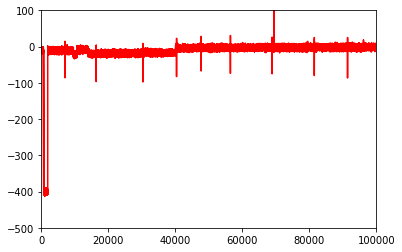

In [16]:
a = np.concatenate(current_pA)
plt.plot(a, 'r')
plt.axis([0, 100000, -500, 100])
plt.show()

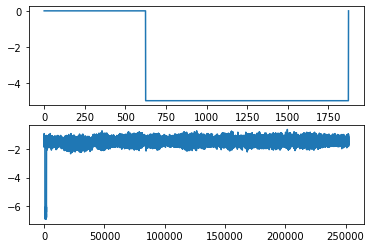

In [12]:
plt.figure(1)
plt.subplot(211)
plt.plot(command[0])
plt.subplot(212)
plt.plot(voltage_mV[0])
plt.show()

## Find Test pulse and obtain Seal resistance

In [ ]:
def parse_TTL_edges(TTL, edgeType):
    trial =0
    edges = []
    
    while len(edges)<1 and trial < len(TTL):
    
        if 'rising' in edgeType:
            edges = np.where(np.diff(TTL[trial])>0) 
        elif 'falling' in edgeType:
            edges = np.where(np.diff(TTL[trial])<0) 
        elif 'both' in edgeType:
            edges = np.where(np.diff(TTL[trial])!=0)    
            
        edges = edges + np.full(len(edges),1) #+1 to correct the shift due to differentiation
        edges = edges[0] #just to unwrap the array
        
        trial = trial+1
    
    
    return edges